# Importing libraries that would be needed:
- SNS and matplotlib for visulisation.
- Here we will use, scikit, statsmodel, numpy and pandas for analysis.
- SciKit will be used for training/splitting the dataset, and also for preprocessing on the dataset.
- statsmodels will be used to fit and transform the dataset. And later it will be used to see the summary statistics.
- So let's first import them.

In [94]:
# importing necessary libraries
import numpy as np, pandas as pd, matplotlib.pyplot as plt, seaborn as sns
import sklearn
from sklearn.model_selection import train_test_split
# For performing the minMax scaling
from sklearn.preprocessing import MinMaxScaler
# For having a peek at the summary statistics
import statsmodels.api as sm
from statsmodels.stats.outliers_influence import variance_inflation_factor
# For checking the R2 score of models which we will make
from sklearn.metrics import r2_score
from sklearn.feature_selection import RFE
from sklearn.linear_model import LinearRegression

In [95]:
# Suppressing the warnings
import warnings
warnings.filterwarnings('ignore')

## Steps we would follow to build the model:
1. Read the data
2. Check for data inconsistency(Like null values and so on)
3. If any inconsistency in data is found we will solve those inconsitencies.
4. Once the data is ready, We will test and split, extract X and Y from the dataset.
5. Create an object for linear regression
6. Fit the model
7. See the params affecting the model.
8. If not satisfied with the model, remove/add a few variables as per the need. Repeat this step till desired efficiency of model is arrived.
9. Evaluate the R2, VIF, and other meterics on train data and the same on test data.
10. Check if the assumptions made my linear reggression are followed.(Which will be explained as we go along the code.)

In [96]:
# Reading the data:
bykSharingData=pd.read_csv('day.csv')

In [97]:
# Checking the head of the data
bykSharingData.head()

,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,01-01-2018,1,0,1,0,6,0,2,14.110847,18.18125,80.5833,10.749882,331,654,985
1,2,02-01-2018,1,0,1,0,0,0,2,14.902598,17.68695,69.6087,16.652113,131,670,801
2,3,03-01-2018,1,0,1,0,1,1,1,8.050924,9.47025,43.7273,16.636703,120,1229,1349
3,4,04-01-2018,1,0,1,0,2,1,1,8.200000,10.60610,59.0435,10.739832,108,1454,1562
4,5,05-01-2018,1,0,1,0,3,1,1,9.305237,11.46350,43.6957,12.522300,82,1518,1600


In [98]:
# Checking the total number of rows and columns:
bykSharingData.shape

(730, 16)

In [99]:
# Checking of null entries if any.
bykSharingData.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 730 entries, 0 to 729
Data columns (total 16 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   instant     730 non-null    int64  
 1   dteday      730 non-null    object 
 2   season      730 non-null    int64  
 3   yr          730 non-null    int64  
 4   mnth        730 non-null    int64  
 5   holiday     730 non-null    int64  
 6   weekday     730 non-null    int64  
 7   workingday  730 non-null    int64  
 8   weathersit  730 non-null    int64  
 9   temp        730 non-null    float64
 10  atemp       730 non-null    float64
 11  hum         730 non-null    float64
 12  windspeed   730 non-null    float64
 13  casual      730 non-null    int64  
 14  registered  730 non-null    int64  
 15  cnt         730 non-null    int64  
dtypes: float64(4), int64(11), object(1)
memory usage: 91.4+ KB


- Here there are 16 columns and we can clearly see there are no null values or NANs present in the dataset. Which acts as a boon.

In [100]:
bykSharingData.describe()

,instant,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
count,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000
mean,365.500000,2.498630,0.500000,6.526027,0.028767,2.997260,0.683562,1.394521,20.319259,23.726322,62.765175,12.763620,849.249315,3658.757534,4508.006849
std,210.877136,1.110184,0.500343,3.450215,0.167266,2.006161,0.465405,0.544807,7.506729,8.150308,14.237589,5.195841,686.479875,1559.758728,1936.011647
min,1.000000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,1.000000,2.424346,3.953480,0.000000,1.500244,2.000000,20.000000,22.000000
25%,183.250000,2.000000,0.000000,4.000000,0.000000,1.000000,0.000000,1.000000,13.811885,16.889713,52.000000,9.041650,316.250000,2502.250000,3169.750000
50%,365.500000,3.000000,0.500000,7.000000,0.000000,3.000000,1.000000,1.000000,20.465826,24.368225,62.625000,12.125325,717.000000,3664.500000,4548.500000
75%,547.750000,3.000000,1.000000,10.000000,0.000000,5.000000,1.000000,2.000000,26.880615,30.445775,72.989575,15.625589,1096.500000,4783.250000,5966.000000
max,730.000000,4.000000,1.000000,12.000000,1.000000,6.000000,1.000000,3.000000,35.328347,42.044800,97.250000,34.000021,3410.000000,6946.000000,8714.000000


# Removing the varibles which aren't business oriented
- instant(The record index)- This field acts as ID of the dataset, which isn't needed anymore.
- dteday(Date)- This variable is also not needed as we have other variables which provides a better picture when a bike was hired.
- casual(Count of casual users) & registered(Registered user): We are only interesetd in increasing the user engagement with bikes, We are not interested if they are casual or registered user.

In [101]:
# Removing the above variables as they are not needed for the analysis, as they arenot business oriented.
bykSharingData=bykSharingData.drop(['instant','dteday','casual','registered'],axis=1)

In [102]:
bykSharingData.head()

,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,cnt
0,1,0,1,0,6,0,2,14.110847,18.18125,80.5833,10.749882,985
1,1,0,1,0,0,0,2,14.902598,17.68695,69.6087,16.652113,801
2,1,0,1,0,1,1,1,8.050924,9.47025,43.7273,16.636703,1349
3,1,0,1,0,2,1,1,8.200000,10.60610,59.0435,10.739832,1562
4,1,0,1,0,3,1,1,9.305237,11.46350,43.6957,12.522300,1600


In [103]:
bykSharingData.shape

(730, 12)

- Till now we've confirmed the drop opreation which was made by checking the head and the shape of the dataset.
- Now we are good to go for EDA on the data set.

 # Performing Exploratory Data Analysis on the data set
 - The reason for this is that, we can identify what sort of columns we need to use in the dataset for the model to be trained.
 - This also helps us to see if it is possible to construct a model for this dataset.
 - This will also help us to know the data, how the fields are related to each other.

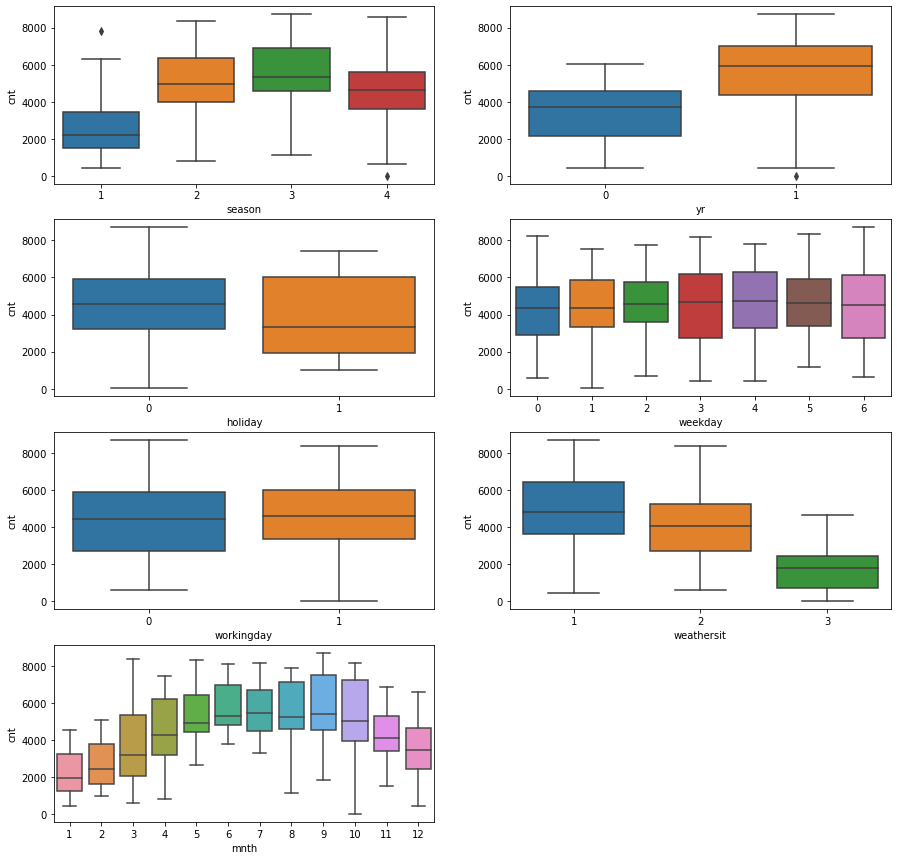

In [104]:
# From the data dictionary:season,yr(year),holiday,weekday,workingday, and weathersit(Type of weather) are categorical values
# So let's use boxplots to visualise these variables:

# Declared the size of the figure & boxplot for season vs cnt
plt.figure(figsize=(15,15))
plt.subplot(4,2,1)
sns.boxplot(x='season',y='cnt',data=bykSharingData)

plt.subplot(4,2,2)
sns.boxplot(x='yr',y='cnt',data=bykSharingData)

plt.subplot(4,2,3)
sns.boxplot(x='holiday',y='cnt',data=bykSharingData)

plt.subplot(4,2,4)
sns.boxplot(x='weekday',y='cnt',data=bykSharingData)

plt.subplot(4,2,5)
sns.boxplot(x='workingday',y='cnt',data=bykSharingData)

plt.subplot(4,2,6)
sns.boxplot(x='weathersit',y='cnt',data=bykSharingData)

plt.subplot(4,2,7)
sns.boxplot(x='mnth',y='cnt',data=bykSharingData)
plt.show()

- Here on the Y-axis we've taken CNT(Total number of rental bikes), and different categorical variables on the X-axis

# Inferences from the box plots:
- Season 'Fall' has highest median of rentals(Around 6000 bookings).
- Yearly the popularity of the application is increasing. As in 2019 the renatls were increased(Around 6000 bookings).
- On holidays more bikes are rented(From 2000 to 6000).
- Almost similar trend is seen during week days, because a similar median is observed during the weekdays(A constant median greater than 400 but less than 4500 is seen).
- When the day is not working the the rentals have slightly increased(The median is around 4200).
- Clear weather tends to have a better chance of rentals to be increasesd(Medain booking is around 4200~4300 bookings).
- The months May, June, July, August, September, and October are likely to be very ideal for business(In month of may the medain is around 4500 bookings, which is almost constant till october which maintains consistency).

Note: The values of 0,1 are feteched from the data dictionary provided

<Figure size 1440x1440 with 0 Axes>

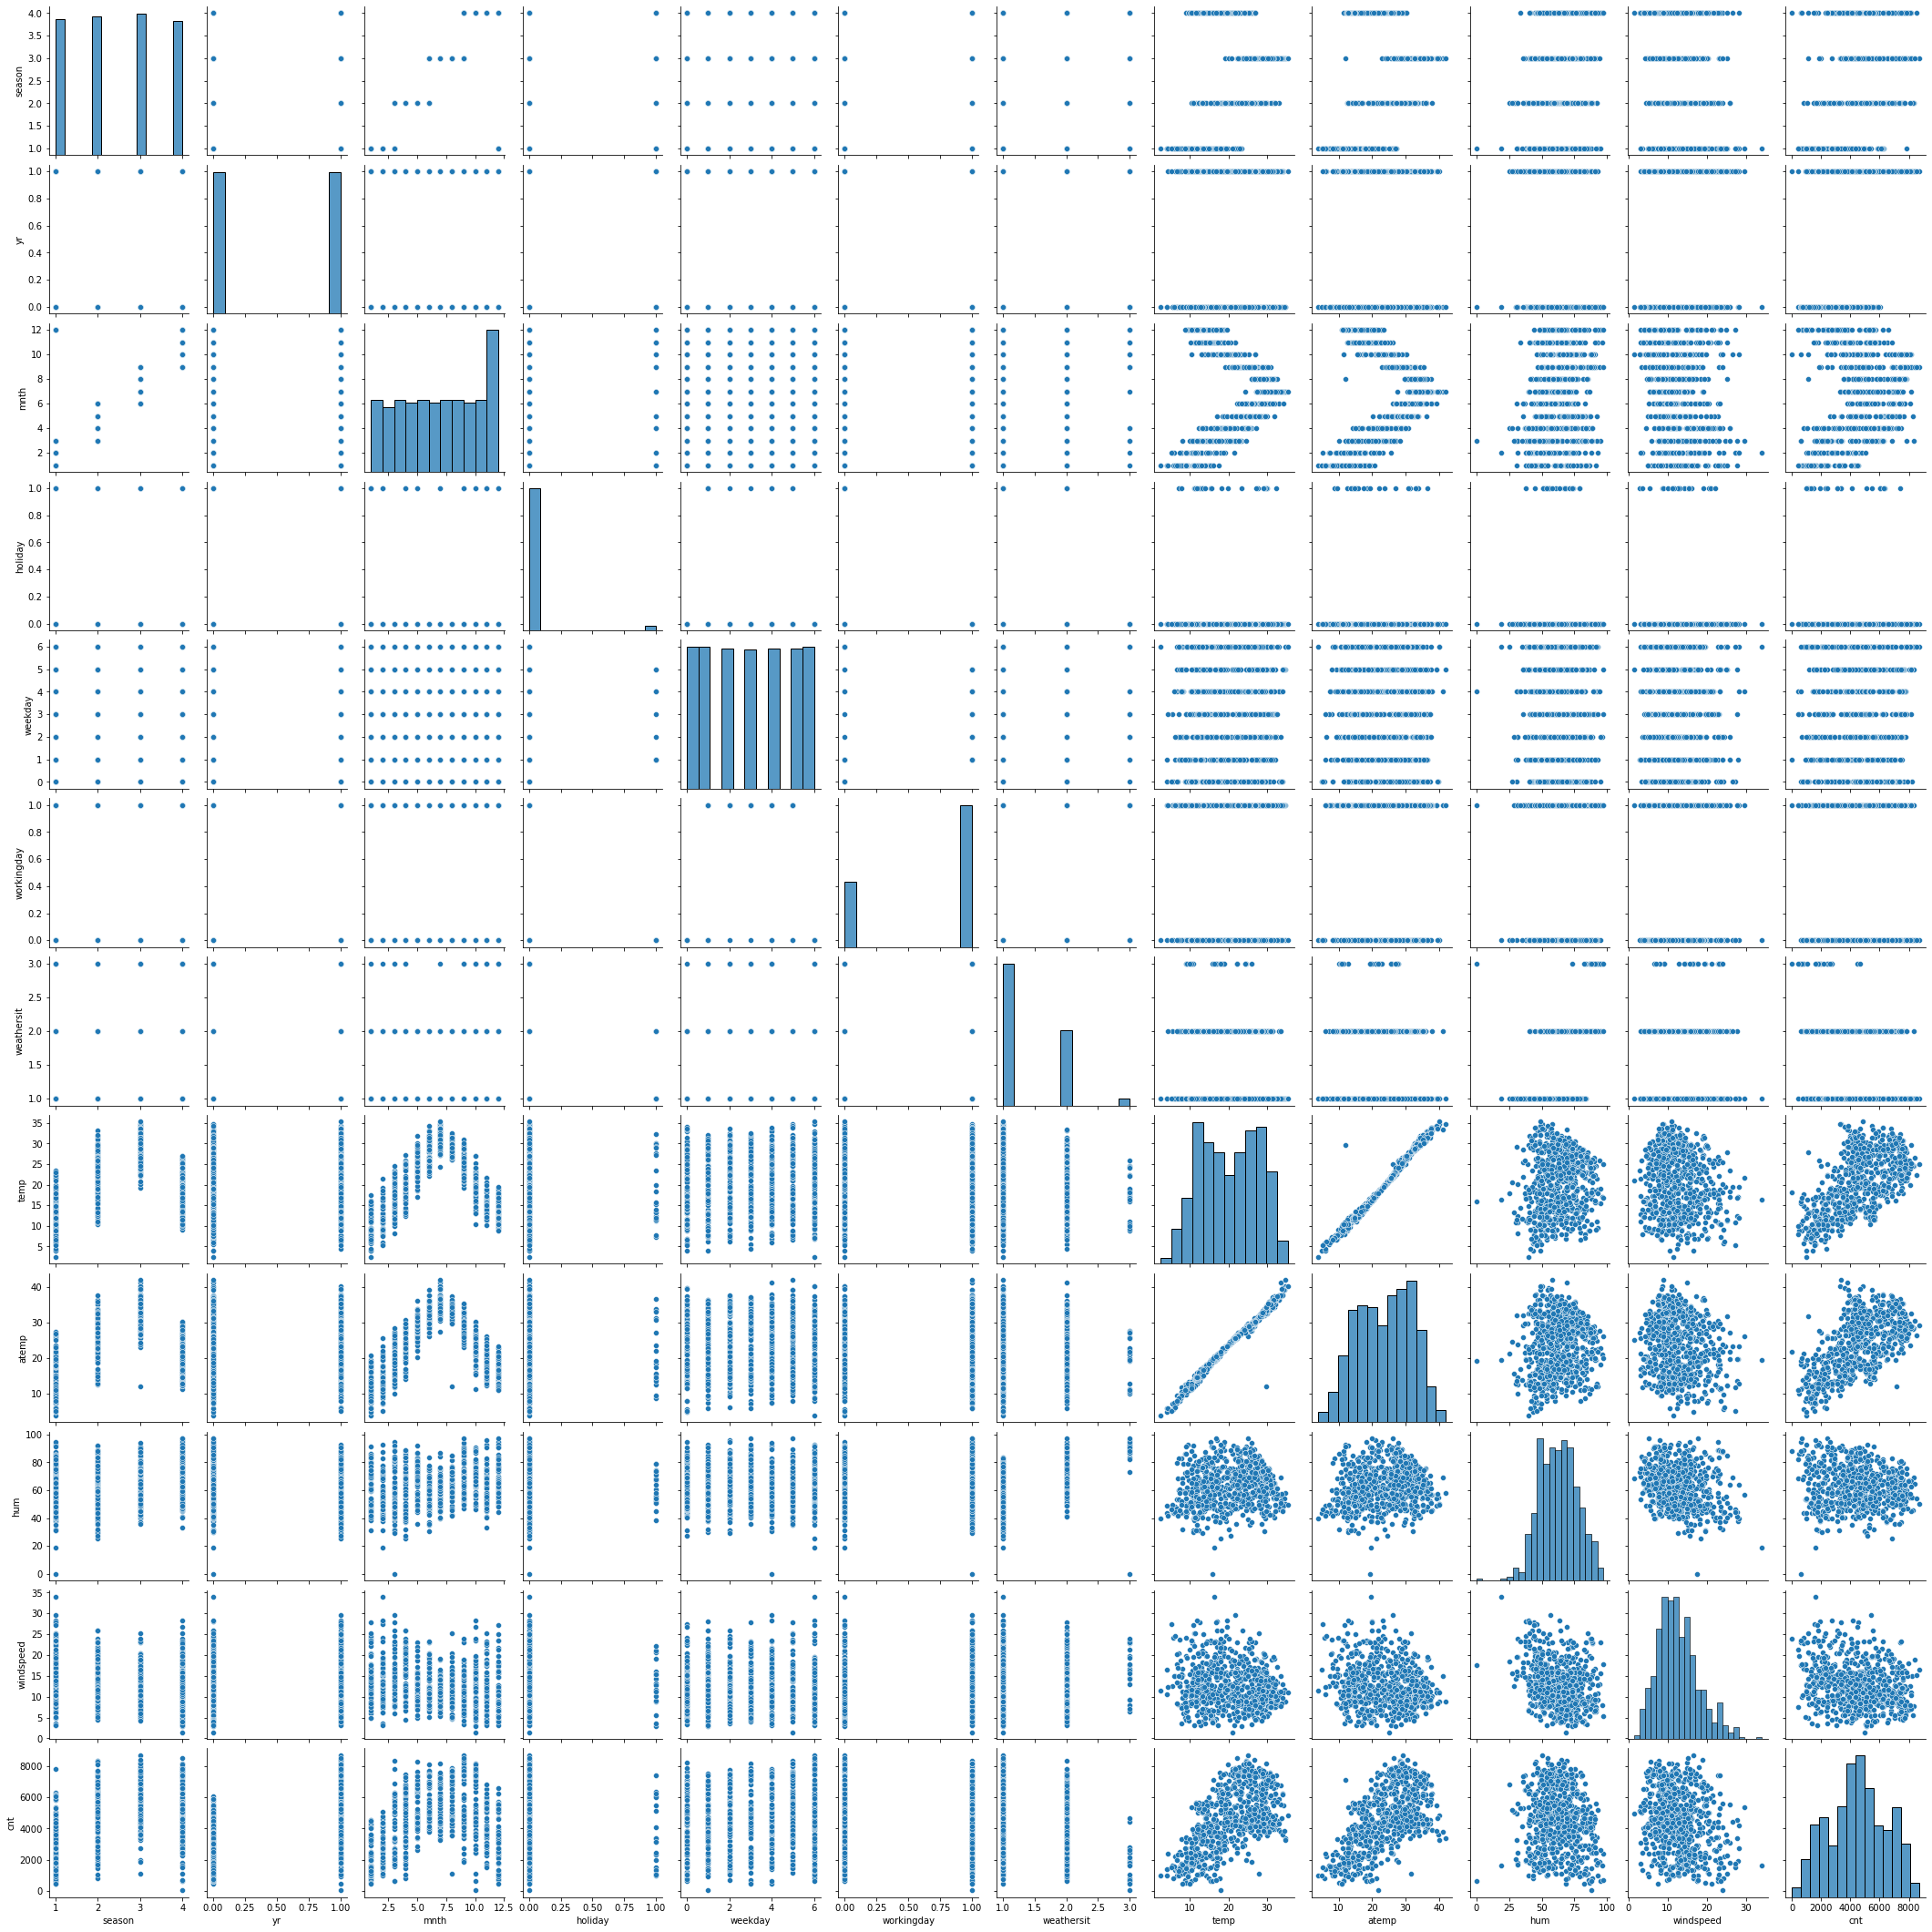

In [105]:
# Let's see the correlation of various fields with respect to each other:
plt.figure(figsize=(20,20))
sns.pairplot(bykSharingData)
plt.show()

- The numeric data present here, shows us that there are atleast a few columns which can be used for preparing the liner model such as, temp, atemp, windspeed. There are also categorical vairbles which would definately come into the picture once they are scaled using MinMax scaling.

# Let's split the data for testing and training using SKlearn
- We will follow the standard <bold>70:30</bold> ratio for training and testing

In [106]:
# Splitting the data into test data and training dataset.
df_train,df_test=train_test_split(bykSharingData,train_size=0.7,random_state=100)

In [107]:
df_train.shape

(510, 12)

In [108]:
df_test.shape

(220, 12)

# Scaling using minmax scaling
## (MinMax scaling=(x-x_min)/(x_max-xmin))

In [109]:
# Creating a scalar object
scaler=MinMaxScaler()

In [110]:
num_vars=['temp','atemp','hum','windspeed','cnt']
df_train[num_vars]=scaler.fit_transform(df_train[num_vars])
df_train.head()

,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,cnt
576,3,1,7,0,2,1,1,0.815169,0.766351,0.725633,0.264686,0.827658
426,1,1,3,0,6,0,2,0.442393,0.438975,0.640189,0.255342,0.465255
728,1,1,12,0,0,0,1,0.245101,0.200348,0.498067,0.663106,0.204096
482,2,1,4,0,6,0,2,0.395666,0.391735,0.504508,0.188475,0.482973
111,2,0,4,0,5,1,2,0.345824,0.318819,0.751824,0.380981,0.191095


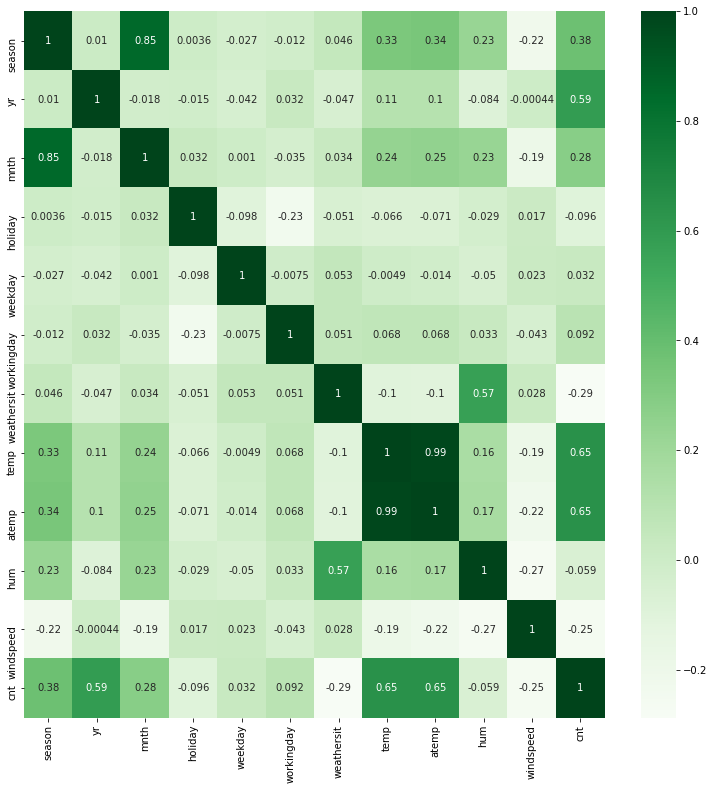

In [111]:
#Let's visualise with a heatmap, for seeing the collinearity
plt.figure(figsize=(13,13))
sns.heatmap(df_train.corr(),annot=True,cmap='Greens')
plt.show()

- The variables of temp,yr, and season have a high collinearity

### Seperating X and Y from the dataset to train the model

In [112]:
# Data for y-axis
y_train=df_train.pop('cnt')
X_train=df_train

In [113]:
# Creating a object of linear model
lm=LinearRegression()

In [114]:
lm.fit(X_train,y_train)
# Performing RFE for top 10 variables
rfe=RFE(lm,10)
rfe=rfe.fit(X_train,y_train)

In [115]:
list(zip(X_train.columns,rfe.support_,rfe.ranking_))

[('season', True, 1),
 ('yr', True, 1),
 ('mnth', False, 2),
 ('holiday', True, 1),
 ('weekday', True, 1),
 ('workingday', True, 1),
 ('weathersit', True, 1),
 ('temp', True, 1),
 ('atemp', True, 1),
 ('hum', True, 1),
 ('windspeed', True, 1)]

In [116]:
col=X_train.columns[rfe.support_]
col

Index(['season', 'yr', 'holiday', 'weekday', 'workingday', 'weathersit',
       'temp', 'atemp', 'hum', 'windspeed'],
      dtype='object')

- The above columns will are significant as per RFE(Recursive feature elimination).

In [117]:
X_train.columns[~rfe.support_]

Index(['mnth'], dtype='object')

- As seen, from the boxplots the months usn't an important feature for the analysis. As it has a constant median, We want to consider the fields which increases the rental.

## Building the model with stats model for statistics and summary

In [118]:
# Here we have only take the variables which actually make an impact on the business decision.
X_train_rfe=X_train[col]

In [119]:
# As we are using statsmodel we need to add a constant.
X_train_rfe=sm.add_constant(X_train_rfe)

In [120]:
lm=sm.OLS(y_train,X_train_rfe).fit()

In [121]:
lm.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    cnt   R-squared:                       0.804
Model:                            OLS   Adj. R-squared:                  0.800
Method:                 Least Squares   F-statistic:                     204.5
Date:                Wed, 07 Apr 2021   Prob (F-statistic):          2.29e-169
Time:                        22:13:32   Log-Likelihood:                 454.24
No. Observations:                 510   AIC:                            -886.5
Df Residuals:                     499   BIC:                            -839.9
Df Model:                          10                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.2160      0.030      7.202      0.000       0.157       0.275
season         0.0432      0.004      9.880      0.000       0.035       0.052
yr             0.2350      0.009     26.082      0.000       0.217       0.253
holiday       -0.0694      0.029     -2.371      0.018      -0.127      -0.012
weekday        0.0078      0.002      3.490      0.001       0.003       0.012
workingday     0.0196      0.010      1.991      0.047       0.000       0.039
weathersit    -0.0786      0.010     -7.514      0.000      -0.099      -0.058
temp           0.2144      0.139      1.538      0.125      -0.060       0.488
atemp          0.2832      0.150      1.892      0.059      -0.011       0.577
hum           -0.0997      0.041     -2.417      0.016      -0.181      -0.019
windspeed     -0.1577      0.029     -5.489      0.000      -0.214      -0.101
==============================================================================
Omnibus:                       62.112   Durbin-Watson:                   2.023
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              141.702
Skew:                          -0.656   Prob(JB):                     1.70e-31
Kurtosis:                       5.224   Cond. No.                         217.
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

- Here we should remove temp as it has higher p value. We will treat all variables having p-values higher than 0.05

In [122]:
X=X_train_rfe.drop('temp',axis=1)

- We've removed temp as it was having higher p-value, let's train the model again.

In [123]:
X_train_sm=sm.add_constant(X)
lr=sm.OLS(y_train,X_train_sm)
lr_model=lr.fit()

In [124]:
lr_model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    cnt   R-squared:                       0.803
Model:                            OLS   Adj. R-squared:                  0.799
Method:                 Least Squares   F-statistic:                     226.3
Date:                Wed, 07 Apr 2021   Prob (F-statistic):          4.80e-170
Time:                        22:13:34   Log-Likelihood:                 453.03
No. Observations:                 510   AIC:                            -886.1
Df Residuals:                     500   BIC:                            -843.7
Df Model:                           9                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.2127      0.030      7.101      0.000       0.154       0.272
season         0.0432      0.004      9.869      0.000       0.035       0.052
yr             0.2353      0.009     26.088      0.000       0.218       0.253
holiday       -0.0678      0.029     -2.315      0.021      -0.125      -0.010
weekday        0.0080      0.002      3.585      0.000       0.004       0.012
workingday     0.0198      0.010      2.014      0.045       0.000       0.039
weathersit    -0.0781      0.010     -7.461      0.000      -0.099      -0.058
atemp          0.5104      0.023     21.845      0.000       0.465       0.556
hum           -0.1028      0.041     -2.492      0.013      -0.184      -0.022
windspeed     -0.1507      0.028     -5.306      0.000      -0.207      -0.095
==============================================================================
Omnibus:                       63.967   Durbin-Watson:                   2.031
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              153.102
Skew:                          -0.658   Prob(JB):                     5.68e-34
Kurtosis:                       5.339   Cond. No.                         51.4
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

- Now all the p-values are less than 0.05 which means the variables are pefrect to be checked for Variance Inflation factor(VIF)

In [125]:
vif=pd.DataFrame()
vif['Features']=X.columns
vif['VIF']=[variance_inflation_factor(X.values,i) for i in range(X.shape[1])]
vif['VIF']=round(vif['VIF'],2)
vif = vif.sort_values(by="VIF",ascending=False)
vif

,Features,VIF
0,const,45.29
8,hum,1.82
6,weathersit,1.66
7,atemp,1.24
1,season,1.19
9,windspeed,1.17
3,holiday,1.08
5,workingday,1.07
2,yr,1.03
4,weekday,1.03


- Here we can see that the VIF is pretty low for all the variables which means no need to remove any variable.

# Residual analysis

In [126]:
y_train_pred=lr_model.predict(X_train_sm)

In [127]:
res=y_train-y_train_pred

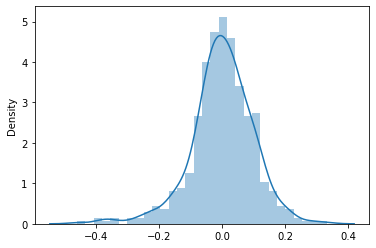

In [128]:
sns.distplot(res)
plt.show()

- Our model follows the assumptions. The mean error is 0.

# Evaluating the model on test data

In [129]:
# Transforming the test data to achive the similar results on the data set.
df_test[num_vars]=scaler.transform(df_test[num_vars])
df_test.head()

,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,cnt
184,3,0,7,1,1,0,2,0.831783,0.769660,0.657364,0.084219,0.692706
535,2,1,6,0,3,1,1,0.901354,0.842587,0.610133,0.153728,0.712034
299,4,0,10,0,4,1,2,0.511964,0.496145,0.837699,0.334206,0.303382
221,3,0,8,0,3,1,1,0.881625,0.795343,0.437098,0.339570,0.547400
152,2,0,6,0,4,1,1,0.817246,0.741471,0.314298,0.537414,0.569029


In [130]:
df_test.shape

(220, 12)

In [131]:
y_test=df_test.pop('cnt')
X_test=df_test

In [132]:
# Adding constant in the test data
X_test_sm=sm.add_constant(X_test)

In [133]:
X_test_sm.head()

,const,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed
184,1.0,3,0,7,1,1,0,2,0.831783,0.769660,0.657364,0.084219
535,1.0,2,1,6,0,3,1,1,0.901354,0.842587,0.610133,0.153728
299,1.0,4,0,10,0,4,1,2,0.511964,0.496145,0.837699,0.334206
221,1.0,3,0,8,0,3,1,1,0.881625,0.795343,0.437098,0.339570
152,1.0,2,0,6,0,4,1,1,0.817246,0.741471,0.314298,0.537414


In [134]:
X_test_sm=X_test_sm.drop(['mnth','temp'],axis=1)

In [135]:
# Ready to make predictions now:
y_test_pred=lr_model.predict(X_test_sm)

In [136]:
# Evalutaing the model
r2_score(y_test,y_test_pred)

0.7860345002670187

- The model works well on the test data too with 78% of accuracy.